In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
df_train = pd.read_json('data/train.json')
df_test = pd.read_json('data/test.json')

In [3]:
managers_train = df_train[['manager_id', 'interest_level']]
managers_test = df_test['manager_id']

In [4]:
del df_train
del df_test

In [5]:
managers_all = pd.concat([managers_train['manager_id'], managers_test], ignore_index = True)

In [6]:
managers_all.shape

(124011,)

In [14]:
sum(managers_all.value_counts() > 20)

1166

In [31]:
sum(managers_train['manager_id'].value_counts() >= 10)

1063

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

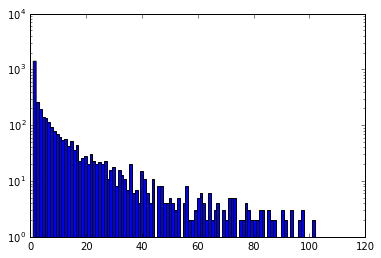

In [29]:
plt.hist(managers_train['manager_id'].value_counts()[60:], bins = 100)
plt.yscale('log')

In [32]:
counts = managers_train['manager_id'].value_counts()

In [34]:
len(counts.index[counts >= 10])

1063

In [37]:
managers_train['manager_count'] = managers_train.groupby('manager_id').transform(len)

In [41]:
np.mean(managers_train['manager_count'] >= 10)

0.85485897228075858

In [42]:
dict(zip([1, 2], [3, 4]))

{1: 3, 2: 4}

In [46]:
class CategoricalFilter(object):
    
    def __init__(self, top_categories = 999):
        self.top_categories = top_categories
    
    def fit(self, series):
        counts = series.value_counts()
        self.category_mapper = dict(zip(counts.index[:self.top_categories],
                                    range(1, self.top_categories + 1)))
    
    def transform(self, series):
        return series.apply(lambda key: self.category_mapper.get(key, 0))

In [47]:
catfilter = CategoricalFilter()

In [48]:
catfilter.fit(managers_train['manager_id'])

In [49]:
transformed = catfilter.transform(managers_train['manager_id'])

In [50]:
transformed.head(20)

10         77
10000      83
100004     39
100007     23
100013    738
100014     19
100016      0
100020      1
100026     84
100027    842
100030    558
10004     733
100044     38
100048    646
10005     178
100051     18
100052    892
100053    934
100055      3
100058      3
Name: manager_id, dtype: int64

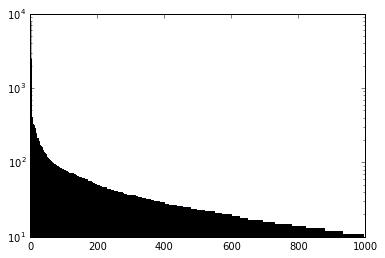

In [53]:
plt.hist(transformed, bins = 1000)
plt.yscale('log')

In [54]:
transformed_test = catfilter.transform(managers_test)

In [55]:
np.mean(transformed_test == 0)

0.17251771387240655

In [56]:
np.mean(transformed == 0)

0.15810909385637867